In [9]:
import sqlite3 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

db_filename = 'dinofunworld.db'
conn = sqlite3.connect(db_filename)
c = conn.cursor()

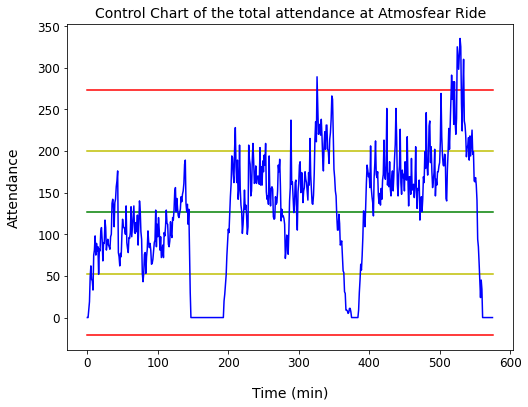

Mean = 126.359375, Standard Deviation = 73.63511071604992


In [41]:
# Question_1: create a control chart of the total attendance at Atomsfear ride
# create a control chart displaying the attendance, the mean, 
# and the standard deviation bands at one and two standard deviations.

c.execute("SELECT attractionID FROM attraction WHERE name='Atmosfear'")
rideID = c.fetchone()[0]

c.execute("SELECT sequence FROM sequences WHERE sequence LIKE '%"+str(rideID)+"%'")
seq = c.fetchall()

seqFrame = pd.DataFrame.from_records(seq, columns=['sequence'])
seqFrame['sequence'] = seqFrame['sequence'].apply(lambda y: [1 if i==str(rideID) else 0 for i in y.split('-')])

attendance = np.sum(seqFrame['sequence'].values.tolist(), axis=0)

mean = np.nanmean(attendance)
std = np.nanstd(attendance)

plt.figure(figsize=(8,6))
plt.plot([0,len(attendance)], [mean, mean], 'g-')
plt.plot([0,len(attendance)], [mean+std, mean+std], 'y-')
plt.plot([0,len(attendance)], [mean-std, mean-std], 'y-')
plt.plot([0,len(attendance)], [mean+2*std, mean+2*std], 'r-')
plt.plot([0,len(attendance)], [mean-2*std, mean-2*std], 'r-')
plt.plot(range(len(attendance)), attendance, 'b-')

plt.xlabel('Time (min)', fontsize=14, labelpad=16)
plt.ylabel('Attendance', fontsize=14, labelpad=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Control Chart of the total attendance at Atmosfear Ride', fontsize=14)
plt.show()

print('Mean = ' + str(mean) + ', Standard Deviation = ' + str(std))

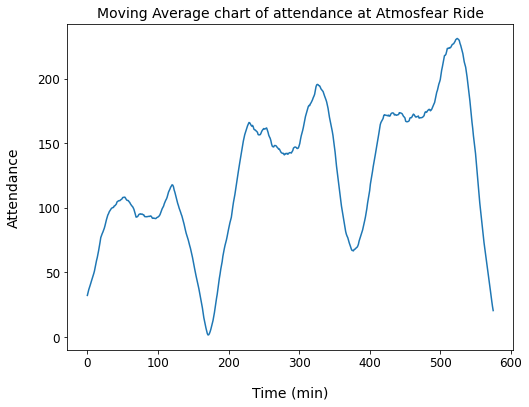

In [40]:
# Question_2: create a moving average chart of the attendance at Atomsfear.
# use 50 samples for the size of the moving average window.

# window_size describes the size of the rolling window over which to average.
window_size = 50

# Compute and plot the moving average.
plt.figure(figsize=(8,6))
plt.plot(np.convolve(attendance, np.ones(window_size)/window_size, 'same'))

plt.title('Moving Average chart of attendance at Atmosfear Ride', fontsize=14)
plt.xlabel('Time (min)', fontsize=14, labelpad=16)
plt.ylabel('Attendance', fontsize=14, labelpad=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

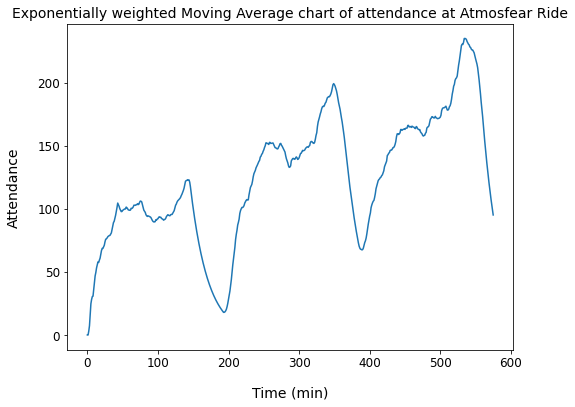

In [39]:
# Question_3: create a moving average chart of the attendance at Atomsfear.
# using 50-sample moving average window with the average computed with exponential weighting.

# Convert the np array of attendance into a dataframe.
df = pd.DataFrame({'Attendance':attendance})

# Perform the Exp. moving average computation.
df_exp = df.ewm(span=50).mean()

# Plot the result.
plt.figure(figsize=(8,6))
plt.plot(df_exp)
plt.title('Exponentially weighted Moving Average chart of attendance at Atmosfear Ride', fontsize=14)
plt.xlabel('Time (min)', fontsize=14, labelpad=16)
plt.ylabel('Attendance', fontsize=14, labelpad=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()